In [45]:
#
#
# Example of filament identification 
# using the Hessian matrix method as implemented in
# Soler et al. (2022) Astronomy & Astrophysics, Volume 662, id.A96, 31 pp.
#
# This file is part of Magnetar
# Copyright (C) 2013-2024 Juan D. Soler


import os
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

sys.path.append('../')
from hessiananalysis import *

import imageio

In [46]:
indir='../data/'
prefix='Taurusfwhm10'

In [47]:
# Loading Taurus column density map
hdu=fits.open(indir+'Taurusfwhm5_logNHmap.fits')
logNHmap=hdu[0].data
hdrREF=hdu[0].header
hdu.close()

In [124]:
# Defining input parameters for Hessian matrix computation 
pxksz=5 # Derivative kernel size in pixels

In [125]:
outputHES=HessianAnalysis(logNHmap, pxksz=pxksz)

In [126]:
# Retrieving the second eigenvalue of the Hessian matrix
lambdaminus=outputHES['lminus']

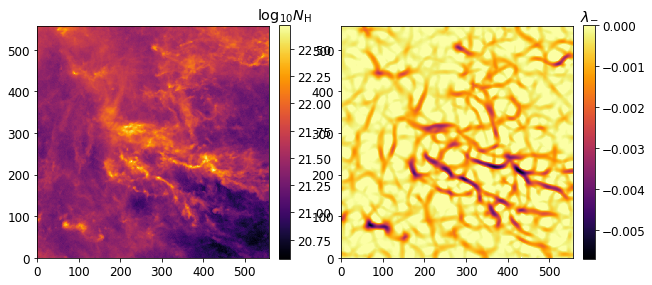

In [143]:
fig = plt.figure(figsize=(10.0,16.0))
plt.rc('font', size=12)
ax1=plt.subplot(121)
im1=ax1.imshow(logNHmap, origin='lower', interpolation='none', cmap='inferno')
cbar=fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
cbar.ax.set_title(r'$\log_{10}N_{\rm H}$')
ax2=plt.subplot(122)
im2=ax2.imshow(lambdaminus, origin='lower', interpolation='none', cmap='inferno', vmax=0.)
cbar=fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
cbar.ax.set_title(r'$\lambda_{-}$')
plt.show()

In [76]:
# Retrieving filament orientation angles
theta=outputHES['theta'].copy()
# This angle is only meaninful when lambdaminus < 0.
lambdaminusthres=0.
theta[(lambdaminus >= lambdaminusthres)]=np.nan

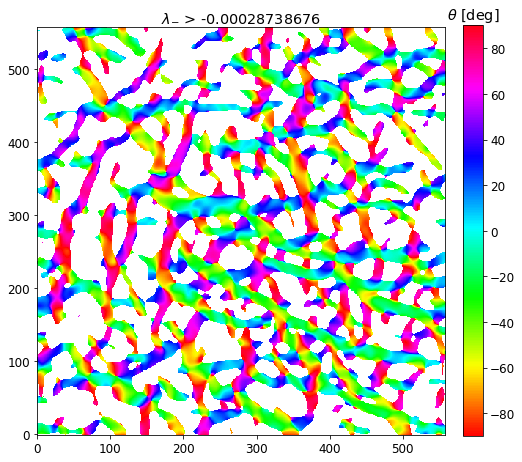

In [87]:
fig = plt.figure(figsize=(8.0,8.0))
plt.rc('font', size=12)
ax1=plt.subplot(111)
ax1.set_title(r'$\lambda_{-}$ > '+str(lambdaminusthres))
im=ax1.imshow(np.rad2deg(theta), origin='lower', interpolation='none', cmap='hsv')
cbar=fig.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)
cbar.ax.set_title(r'$\theta$ [deg]')
plt.show()

In [103]:
# Refining the threshold for filament selection
theta=outputHES['theta'].copy()
lambdaminusthres=10.*np.nanmedian(lambdaminus)
theta[(lambdaminus >= lambdaminusthres)]=np.nan

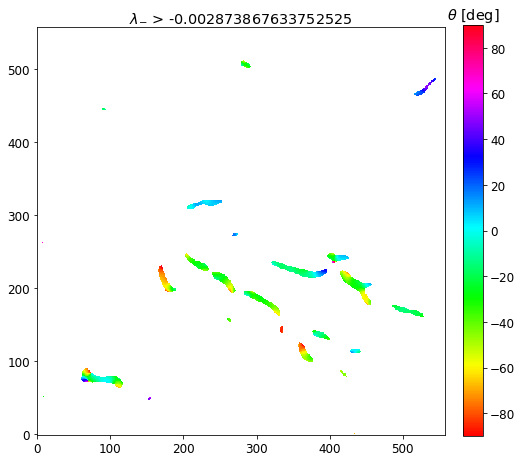

In [104]:
fig = plt.figure(figsize=(8.0,8.0))
plt.rc('font', size=12)
ax1=plt.subplot(111)
ax1.set_title(r'$\lambda_{-}$ > '+str(lambdaminusthres))
im=ax1.imshow(np.rad2deg(theta), origin='lower', interpolation='none', cmap='hsv')
cbar=fig.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)
cbar.ax.set_title(r'$\theta$ [deg]')
plt.show()